<a href="https://colab.research.google.com/github/LucasPerolive/ML-Indicacao_Filmes/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Executando gráfico para ver a quantidade de grupos ideais...

Isso irá demorar um minuto!


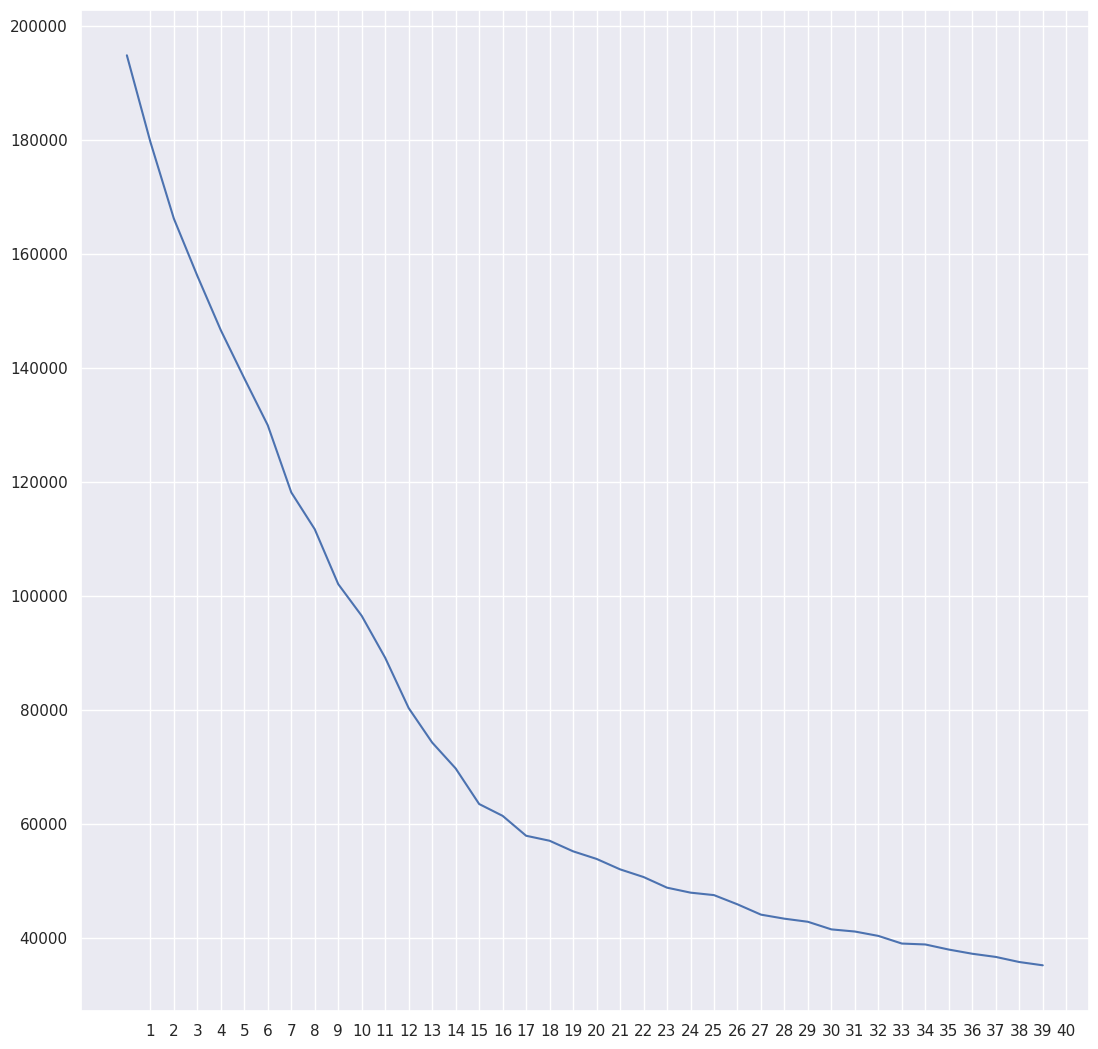

Digite quantos grupos você deseja criar: 17

        1 para ver a quantidade ideal de grupos
        2 para o gráfico dos grupos
        3 para o gráfico dimensional
        4 para o gráfico dedograma
        5 para filtrar os grupos
Digite a opção: 2

Isso irá demorar um minuto!


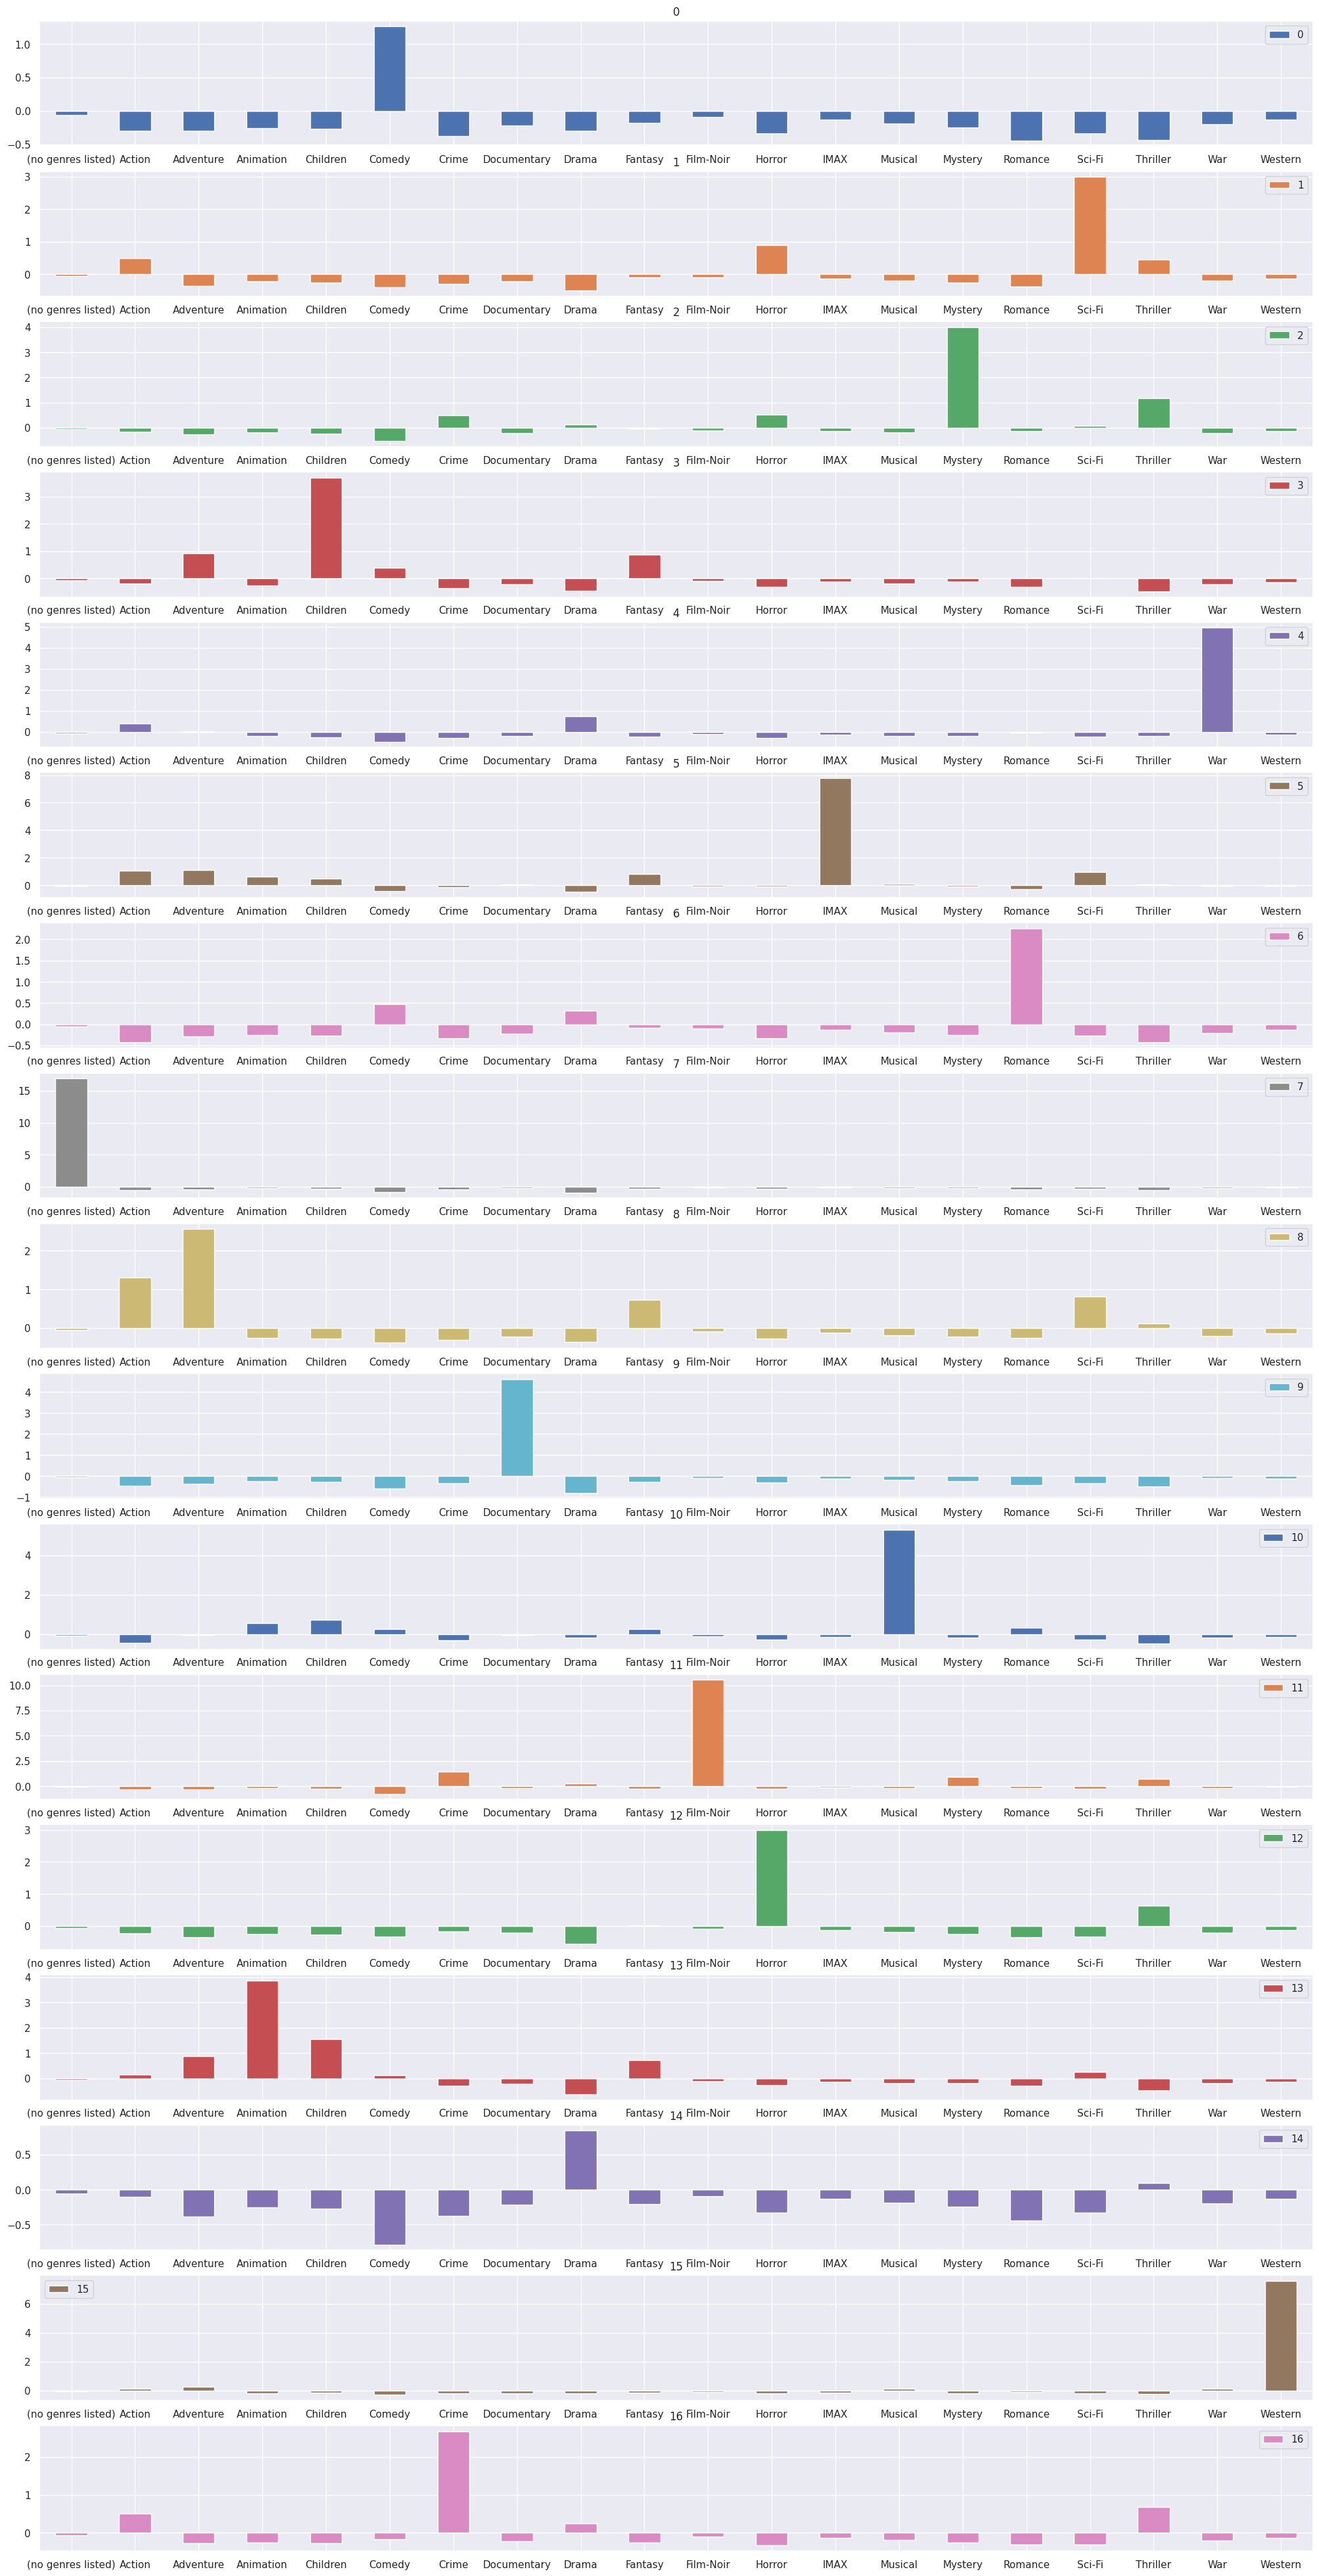

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage


# Lendo arquivo e tratando
filmes = pd.read_csv('movies.csv')
filmes.columns = ['filme_id', 'titulo', 'generos']

# Concatenando os DataFrames e Escalando os generos
generos = filmes.generos.str.get_dummies()
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)

# Muda o estilo do grafico
sns.set(rc={'figure.figsize': (13, 13)})


# Funcoes necessarias
def kmeans(numero_de_clusters, generos):
    modelo = KMeans(n_clusters=numero_de_clusters, n_init=10)
    modelo.fit(generos)
    return [numero_de_clusters, modelo.inertia_]


# Alternativas
def grafico_inertia():
    print("\nIsso irá demorar um minuto!")
    resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
    resultados = pd.DataFrame(resultado, columns=['grupos', 'inertia'])
    resultados.inertia.plot(xticks=resultados.grupos)

    plt.show()


def grafico_grupos():
    print("\nIsso irá demorar um minuto!")
    grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
    grupos_transposed = grupos.transpose()
    grupos_transposed.plot.bar(subplots=True, figsize=(25, 50), sharex=False,
                               rot=0)
    plt.show()


def grafico_dimensional():
    print("\nIsso irá demorar um minuto!")
    tsne = TSNE()
    visualizacao = tsne.fit_transform(generos_escalados)
    sns.scatterplot(x=visualizacao[:, 0], y=visualizacao[:, 1],
                    hue=modelo.labels_,
                    palette=sns.color_palette('Set1', grupos))
    plt.show()


def dedograma():
    grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
    matriz_de_distancia = linkage(grupos)
    dendrogram(matriz_de_distancia)
    plt.show()


def filtragem_grupos():
    x = int(input('Qual grupo você deseja ver: '))
    linhas = int(input('Quantidade de linhas: '))
    grupo = x
    filtro = modelo.labels_ == grupo
    return dados_dos_filmes[filtro].head(linhas)


def switch_case(case):
    switch_dict = {
        'opcao1': grafico_inertia,
        'opcao2': grafico_grupos,
        'opcao3': grafico_dimensional,
        'opcao4': dedograma,
        'opcao5': filtragem_grupos
    }
    selected_case = switch_dict.get(case)
    return selected_case()


if 'grupos' not in locals():
    print('Executando gráfico para ver a quantidade de grupos ideais...')
    grafico_inertia()
    grupos = int(input('Digite quantos grupos você deseja criar: '))

else:
    print(f'\nQuantidade de grupos: {grupos}')
    desejo = input('Deseja manter os grupos: S/N ').lower()
    if (desejo == 'n'):
        grupos = int(input('Digite quantos grupos você deseja criar: '))
        modelo = 'reset'

if 'modelo' not in locals():
    modelo = KMeans(n_clusters=grupos, n_init=10)
    modelo.fit(generos_escalados)

if modelo == 'reset':
    modelo = KMeans(n_clusters=grupos, n_init=10)
    modelo.fit(generos_escalados)

print('''
        1 para ver a quantidade ideal de grupos
        2 para o gráfico dos grupos
        3 para o gráfico dimensional
        4 para o gráfico dedograma
        5 para filtrar os grupos''')
opcao = 'opcao' + input('Digite a opção: ')

switch_case(opcao)
